# Traitement

In [114]:
import os
chemin = r'G:\\Esp-mission-Patrimoine\\documentLibrary\\Habitat_Amenagement\\OBSERVATOIRE\\03_AUTRES\\ALTERNANT\\ENZO\\Avancement\\fonctions\\tuto'
os.chdir(chemin)
print(os.getcwd())

import sys
sys.path.append(r'G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\last_version')

import fonctions2
import importlib
importlib.reload(fonctions2)

G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\tuto


<module 'fonctions2' from 'g:\\Esp-mission-Patrimoine\\documentLibrary\\Habitat_Amenagement\\OBSERVATOIRE\\03_AUTRES\\ALTERNANT\\ENZO\\Avancement\\fonctions\\last_version\\fonctions2.py'>

In [8]:
def checkingModalites(fichier_A_traiter):
    
    """
    Donnée : fichier_A_traiter est le fichier (csv ou les sheets excel) original à traiter 
             nom_csv_modalite est le nom exacte du fichier CSV des modalités de cette source et le nom de la table dans pg (sans .csv)         
             path_vars est le chemin d'accès au dossier "vars"
                       
    Résultat : retourne la liste des modalités avec toutes les eventuelles nouvelles modalités et créé le fichier 
               mod.csv associé qui sera versé sur pg
    """
    import pandas as pd
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    global Modalites_nouv
    global nom_csv_modalite
    global path_vars
    EtalonCodeModalID = 0

    Modalites = pd.DataFrame(columns = ['CodeModalID', 'CodeModalEXT', 'LibelleModal', 'Libelle_long', 'Categ_regroupement'])

    #Liste des modalités et de leurs codes
    listeCodeModa = pd.DataFrame(columns = ['code', 'noms', 'Lib_long','categ_regroupement'])    
    #remplacement des caractères spéciaux

    # checking   
    for modalite in range(1,len(fichier_A_traiter.columns)): # 1 pour ne pas prendre en compte codeentite
        print('Modalité recherchée :', fichier_A_traiter.columns[modalite], '\n')
         
        # test
        if(fichier_A_traiter.columns[modalite].lower() in Modalites['CodeModalEXT'].tolist() ):

            ligne = Modalites.loc[(Modalites['CodeModalEXT'] == fichier_A_traiter.columns[modalite].lower())]
            ligne = ligne.reset_index(drop=True)

            listeCodeModa = pd.concat([
                listeCodeModa, pd.DataFrame.from_records([{
                    'code': ligne.CodeModalID[0],
                    'noms': fichier_A_traiter.columns[modalite],
                    'Lib_long': ligne.Libelle_long[0],
                    'categ_regroupement': ligne.Categ_regroupement[0] 
                }])
            ])
        else:
            EtalonCodeModalID += 1 # Créé à partie de la fonction importe



            lib = ''
            categ_regroupement = fichier_A_traiter.columns[modalite] #''

            listeCodeModa = pd.concat([
                listeCodeModa, pd.DataFrame.from_records([{
                    'code': EtalonCodeModalID, #len(Modalites)+1, #len(modalites) nombre de modalites dans la table modalites parce qu'on en rajoute
                    'noms': fichier_A_traiter.columns[modalite],
                    'Lib_long': lib,
                    'categ_regroupement': categ_regroupement 
                }])
            ])

    return listeCodeModa

In [111]:
import random
import string
import pandas as pd
import time

# nbFeuille = 2
nbLigne = 1000000
nbColonne = 10

# for feuille in range(nbFeuille):
ligne = [random.sample(range(0,nbColonne), nbColonne) for i in range(nbLigne)] # 1000 lignes 100 colonnes
# len(ligne)
# len(ligne[0])
# ligne = numpy.array(ligne)
# ligne.shape
str = string.ascii_lowercase
colonne = ''.join(random.choice(str) for i in range(int(nbColonne*2)))
nomColonne = [colonne[2*i:2*(1+i)] for i in range(int(nbColonne))] # marche seulement si nbColonne est pair
nomColonne[0] = 'codeEntite'
tabATraite = pd.DataFrame(ligne, columns = nomColonne)
# tabATraite

In [8]:
listeCodeModa = checkingModalites(tabATraite)
listeCodeModa.head(3)

Modalité recherchée : gy 

Modalité recherchée : pe 

Modalité recherchée : ow 

Modalité recherchée : oz 

Modalité recherchée : ir 

Modalité recherchée : gr 

Modalité recherchée : yb 

Modalité recherchée : ql 

Modalité recherchée : gh 



,code,noms,Lib_long,categ_regroupement
0,1,gy,,gy
0,2,pe,,pe
0,3,ow,,ow


In [10]:
codes_moda = listeCodeModa['code'].tolist()
codes_moda

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
valeurs = tabATraite.iloc[:, 1:len(listeCodeModa)+1].values
valeurs

array([[1, 4, 3, ..., 6, 2, 8],
       [4, 3, 5, ..., 7, 8, 2],
       [0, 6, 1, ..., 3, 4, 7],
       ...,
       [4, 1, 6, ..., 9, 8, 7],
       [7, 3, 2, ..., 1, 6, 0],
       [4, 9, 0, ..., 3, 5, 6]], dtype=int64)

In [ ]:
codes_moda = listeCodeModa['code'].tolist()

In [71]:
codevarid = 1
annee = 2024
echelle = 'Commune'
id_versement = 1
id = 0
newTabTraite = pd.DataFrame(columns = ['CodeVarID', 'Annee', 'codeEntite',
                                 'CodeModalID', 'Echelle', 'id',
                                  'Valeur', 'id_versement'])

listeCodeModa = checkingModalites(tabATraite)
# Préparation des données pour éviter l'accès répété dans les boucles
codes_moda = listeCodeModa['code'].tolist()
valeurs = tabATraite.iloc[:, 1:len(listeCodeModa)+1].values

# Création d'une liste pour stocker les données à concaténer
new_rows = []

start_time = time.time()
duration = 120
seconde = 0
ligne_moins1 = 0
ligne_sec = []

for ligne in range(len(tabATraite)):
    # print(ligne)
    code_ent = tabATraite['codeEntite'][ligne]
    
    current_time = time.time()
    if current_time - start_time >= 1:  # Vérifie si une seconde s'est écoulée
        seconde += 1
        ligne_sec.append([seconde,ligne - ligne_moins1,ligne])
        print(seconde)
        print(ligne - ligne_moins1)
        print(ligne_moins1)
        ligne_moins1 = ligne
        start_time = current_time

    for col, code_moda in enumerate(codes_moda):
        id += 1  # Assurez-vous que 'id' est initialisé avant cette boucle
        new_row = {
            'CodeVarID': codevarid,
            'Annee': annee,
            'Echelle': echelle,
            'codeEntite': code_ent,
            'CodeModalID': code_moda,
            'Valeur': valeurs[ligne, col],
            'id': id,
            'id_versement': id_versement  # Assurez-vous de la mise à jour appropriée de 'id_versement'
        }
        new_rows.append(new_row)

# Conversion de la liste des dictionnaires en DataFrame puis concaténation
newTabTraite = pd.concat([newTabTraite, pd.DataFrame.from_records(new_rows)])

Modalité recherchée : cr 

Modalité recherchée : ei 

Modalité recherchée : pg 

Modalité recherchée : ns 

Modalité recherchée : og 

Modalité recherchée : xy 

Modalité recherchée : kg 

Modalité recherchée : an 

Modalité recherchée : kl 

1
76651
0
2
71954
76651
3
75408
148605
4
73172
224013
5
73125
297185
6
70618
370310
7
73681
440928
8
70742
514609
9
71717
585351
10
72671
657068
11
72635
729739
12
68925
802374
13
72299
871299


In [72]:
codevarid = 1
annee = 2024
echelle = 'Commune'
id_versement = 1
id = 0
newTabTraite = pd.DataFrame(columns = ['CodeVarID', 'Annee', 'codeEntite',
                                 'CodeModalID', 'Echelle', 'id',
                                  'Valeur', 'id_versement'])

listeCodeModa = checkingModalites(tabATraite)


start_time = time.time()
duration = 120
seconde = 0
ligne_moins1 = 0
ligne_sec_ancien = []

for ligne in range(len(tabATraite)):
        
        if time.time() - start_time > duration:
            print("Arrêt de la boucle après 30 secondes.")
            break  # Quitter la boucle
        
        current_time = time.time()
        if current_time - start_time >= 1:  # Vérifie si une seconde s'est écoulée
                seconde += 1
                ligne_sec_ancien.append([seconde,ligne - ligne_moins1,ligne])
                print(seconde)
                print(ligne - ligne_moins1)
                print(ligne_moins1)
                ligne_moins1 = ligne
                start_time = current_time

        # print(ligne)
        # print(time.time())
        
        valeur = []
        codeModa = []
        code_ent = tabATraite['codeEntite'][ligne]
        for col in range(1,len(listeCodeModa)+1):
            valeur.append(tabATraite.iloc[ligne, col]) #iloc[ligne][col] #warnings
            codeModa.append(listeCodeModa.iloc[col-1]['code'])
        for i in range(len(valeur)):
            id = id + 1
            newTabTraite = pd.concat([
                newTabTraite, pd.DataFrame.from_records([{
                    'CodeVarID':codevarid,
                    'Annee':annee,
                    'Echelle': echelle,
                    'codeEntite':code_ent,
                    'CodeModalID':codeModa[i],
                    'Valeur': valeur[i],
                    # 'IndicePosition': str(code_ent)+'0'+str(codeModa[i])+str(annee)+'0'+str(codevarid), #VERIFIER
                    'id': id,
                    'id_versement' : id_versement #chgt date
                }])
            ])

Modalité recherchée : cr 

Modalité recherchée : ei 

Modalité recherchée : pg 

Modalité recherchée : ns 

Modalité recherchée : og 

Modalité recherchée : xy 

Modalité recherchée : kg 

Modalité recherchée : an 

Modalité recherchée : kl 

1
103
0
2
100
103
3
86
203
4
90
289
5
87
379
6
90
466
7
92
556
8
88
648
9
87
736
10
87
823
11
83
910
12
82
993
13
83
1075
14
79
1158
15
80
1237
16
75
1317
17
77
1392
18
76
1469
19
76
1545
20
74
1621
21
68
1695
22
71
1763
23
70
1834
24
70
1904
25
69
1974
26
68
2043
27
67
2111
28
67
2178
29
65
2245
30
66
2310
31
63
2376
32
64
2439
33
64
2503
34
64
2567
35
61
2631
36
61
2692
37
61
2753
38
60
2814
39
58
2874
40
58
2932
41
58
2990
42
57
3048
43
57
3105
44
57
3162
45
55
3219
46
55
3274
47
56
3329
48
54
3385
49
54
3439
50
47
3493
51
45
3540
52
48
3585
53
48
3633
54
48
3681
55
48
3729
56
46
3777
57
46
3823
58
46
3869
59
45
3915
60
46
3960
61
45
4006
62
45
4051
63
45
4096
64
46
4141
65
44
4187
66
44
4231
67
44
4275
68
43
4319
69
43
4362
70
43
4405
71
43
44

KeyboardInterrupt: 

In [29]:
len(ligne_sec_ancien)

2

In [73]:
ligne_sec

[[1, 76651, 76651],
 [2, 71954, 148605],
 [3, 75408, 224013],
 [4, 73172, 297185],
 [5, 73125, 370310],
 [6, 70618, 440928],
 [7, 73681, 514609],
 [8, 70742, 585351],
 [9, 71717, 657068],
 [10, 72671, 729739],
 [11, 72635, 802374],
 [12, 68925, 871299],
 [13, 72299, 943598]]

In [48]:
deuxieme_colonne = [ligne[1] for ligne in ligne_sec]

In [74]:
ligne_sec.append([14,1000000-sum(deuxieme_colonne),1000000])

In [75]:
ligne_sec_nouveau = pd.DataFrame(ligne_sec, columns = ["secondes_nouv", "ligne/sec_nouv","cumul_nouv"])

In [76]:
ligne_sec_ancien = pd.DataFrame(ligne_sec_ancien, columns = ["secondes", "ligne/sec_anc","cumul_anc"])

In [77]:
ligne_sec_pd = pd.merge(ligne_sec_ancien, ligne_sec_nouveau, left_on="secondes", right_on="secondes_nouv", how="outer")

In [78]:
ligne_sec_pd

,secondes,ligne/sec_anc,cumul_anc,secondes_nouv,ligne/sec_nouv,cumul_nouv
0,1,103,103,1.0,76651.0,76651.0
1,2,100,203,2.0,71954.0,148605.0
2,3,86,289,3.0,75408.0,224013.0
3,4,90,379,4.0,73172.0,297185.0
4,5,87,466,5.0,73125.0,370310.0
...,...,...,...,...,...,...
116,117,30,6172,NaN,NaN,NaN
117,118,31,6203,NaN,NaN,NaN
118,119,31,6234,NaN,NaN,NaN
119,120,31,6265,NaN,NaN,NaN


In [89]:
ligne_concat = [1000000 for i in range(0,91)]
len(ligne_concat)

91

In [90]:
seconde_concat = [i for i in range(15,106)]
len(seconde_concat)

91

In [91]:
concat = []
for i in range(len(ligne_concat)):
    concat.append([ligne_concat[i],seconde_concat[i]])
concat

[[1000000, 15],
 [1000000, 16],
 [1000000, 17],
 [1000000, 18],
 [1000000, 19],
 [1000000, 20],
 [1000000, 21],
 [1000000, 22],
 [1000000, 23],
 [1000000, 24],
 [1000000, 25],
 [1000000, 26],
 [1000000, 27],
 [1000000, 28],
 [1000000, 29],
 [1000000, 30],
 [1000000, 31],
 [1000000, 32],
 [1000000, 33],
 [1000000, 34],
 [1000000, 35],
 [1000000, 36],
 [1000000, 37],
 [1000000, 38],
 [1000000, 39],
 [1000000, 40],
 [1000000, 41],
 [1000000, 42],
 [1000000, 43],
 [1000000, 44],
 [1000000, 45],
 [1000000, 46],
 [1000000, 47],
 [1000000, 48],
 [1000000, 49],
 [1000000, 50],
 [1000000, 51],
 [1000000, 52],
 [1000000, 53],
 [1000000, 54],
 [1000000, 55],
 [1000000, 56],
 [1000000, 57],
 [1000000, 58],
 [1000000, 59],
 [1000000, 60],
 [1000000, 61],
 [1000000, 62],
 [1000000, 63],
 [1000000, 64],
 [1000000, 65],
 [1000000, 66],
 [1000000, 67],
 [1000000, 68],
 [1000000, 69],
 [1000000, 70],
 [1000000, 71],
 [1000000, 72],
 [1000000, 73],
 [1000000, 74],
 [1000000, 75],
 [1000000, 76],
 [100000

In [92]:
concat_pd = pd.DataFrame(concat, columns = ["concaténation_1e6", "secondes"])

In [93]:
ligne_sec_concat_pd = pd.merge(ligne_sec_pd, concat_pd, on="secondes", how="outer")

In [94]:
ligne_sec_concat_pd

,secondes,ligne/sec_anc,cumul_anc,secondes_nouv,ligne/sec_nouv,cumul_nouv,concaténation_1e6
0,1,103,103,1.0,76651.0,76651.0,NaN
1,2,100,203,2.0,71954.0,148605.0,NaN
2,3,86,289,3.0,75408.0,224013.0,NaN
3,4,90,379,4.0,73172.0,297185.0,NaN
4,5,87,466,5.0,73125.0,370310.0,NaN
...,...,...,...,...,...,...,...
116,117,30,6172,NaN,NaN,NaN,NaN
117,118,31,6203,NaN,NaN,NaN,NaN
118,119,31,6234,NaN,NaN,NaN,NaN
119,120,31,6265,NaN,NaN,NaN,NaN


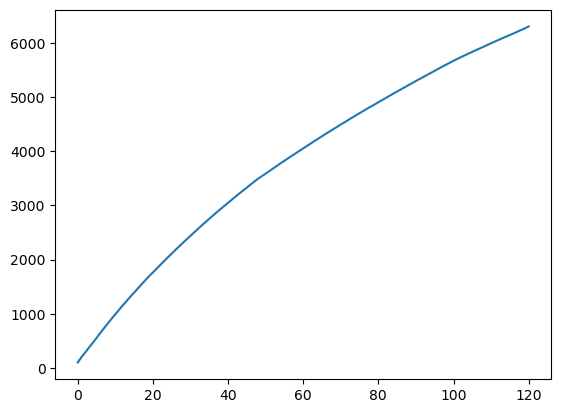

In [85]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

plt.plot(ligne_sec_concat_pd["cumul_nouveau"])
plt.plot(ligne_sec_concat_pd["ligne/sec_anc"])
plt.plot(ligne_sec_concat_pd["ligne/sec_nouv"])

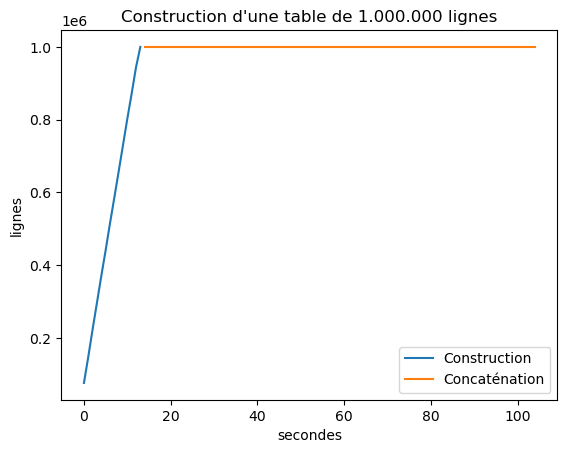

In [95]:
plt.plot(ligne_sec_concat_pd["cumul_nouv"], label='Construction')
plt.plot(ligne_sec_concat_pd["concaténation_1e6"], label='Concaténation')
plt.legend()
plt.title('Construction d\'une table de 1.000.000 lignes')
plt.xlabel('secondes')
plt.ylabel('lignes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


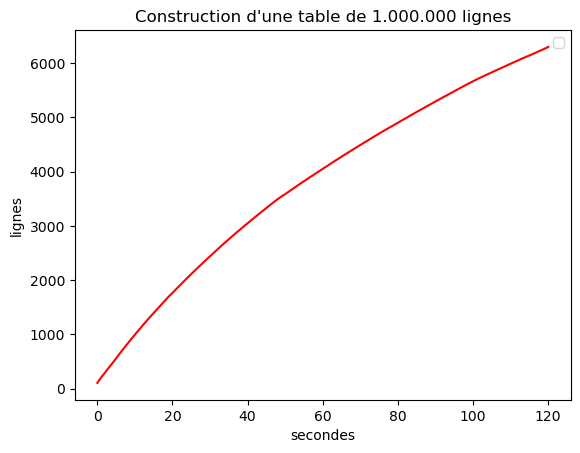

In [101]:
plt.plot(ligne_sec_concat_pd["cumul_anc"],color='red')
plt.legend()
plt.title('Construction d\'une table de 1.000.000 lignes')
plt.xlabel('secondes')
plt.ylabel('lignes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


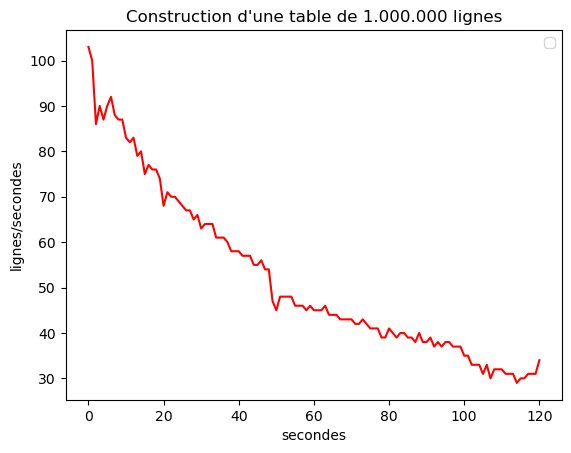

In [100]:
plt.plot(ligne_sec_concat_pd["ligne/sec_anc"],color='red')
plt.legend()
plt.title('Construction d\'une table de 1.000.000 lignes')
plt.xlabel('secondes')
plt.ylabel('lignes/secondes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


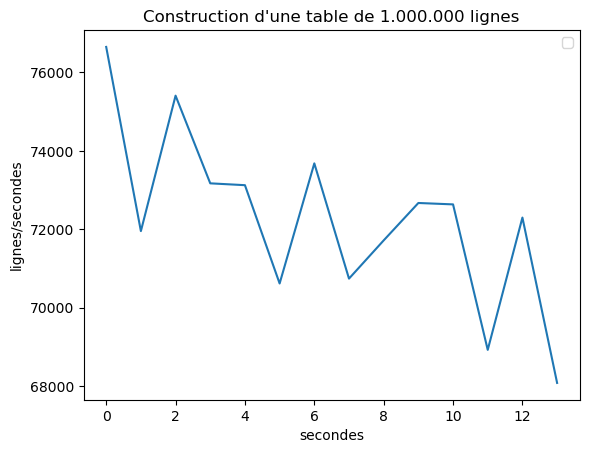

In [99]:
plt.plot(ligne_sec_concat_pd["ligne/sec_nouv"])
plt.legend()
plt.title('Construction d\'une table de 1.000.000 lignes')
plt.xlabel('secondes')
plt.ylabel('lignes/secondes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


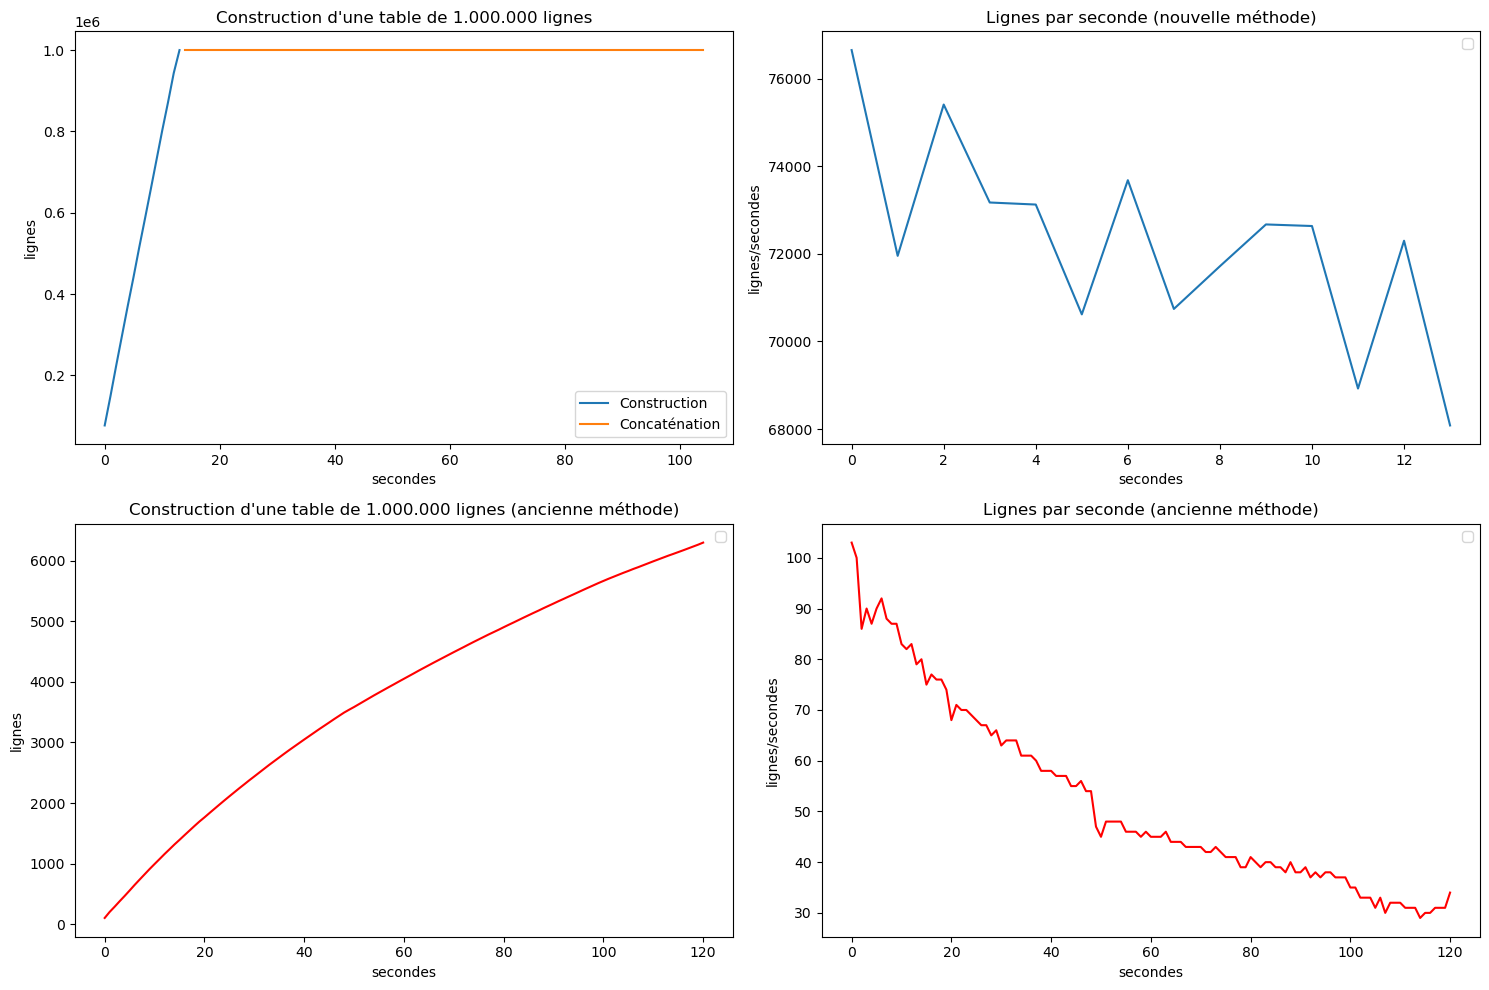

In [102]:
import matplotlib.pyplot as plt

# Création d'une figure et de 4 subplots (2 lignes, 2 colonnes)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Ajustez figsize selon vos besoins

# Plot 1: Construction d'une table de 1.000.000 lignes
axs[0, 0].plot(ligne_sec_concat_pd["cumul_nouv"], label='Construction')
axs[0, 0].plot(ligne_sec_concat_pd["concaténation_1e6"], label='Concaténation')
axs[0, 0].legend()
axs[0, 0].set_title('Construction d\'une table de 1.000.000 lignes')
axs[0, 0].set_xlabel('secondes')
axs[0, 0].set_ylabel('lignes')

# Plot 2: Lignes par seconde pour la nouvelle méthode
axs[0, 1].plot(ligne_sec_concat_pd["ligne/sec_nouv"])
axs[0, 1].legend()
axs[0, 1].set_title('Lignes par seconde (nouvelle méthode)')
axs[0, 1].set_xlabel('secondes')
axs[0, 1].set_ylabel('lignes/secondes')

# Plot 3: Construction d'une table avec l'ancienne méthode
axs[1, 0].plot(ligne_sec_concat_pd["cumul_anc"], color='red')
axs[1, 0].legend()
axs[1, 0].set_title('Construction d\'une table de 1.000.000 lignes (ancienne méthode)')
axs[1, 0].set_xlabel('secondes')
axs[1, 0].set_ylabel('lignes')

# Plot 4: Lignes par seconde pour l'ancienne méthode
axs[1, 1].plot(ligne_sec_concat_pd["ligne/sec_anc"], color='red')
axs[1, 1].legend()
axs[1, 1].set_title('Lignes par seconde (ancienne méthode)')
axs[1, 1].set_xlabel('secondes')
axs[1, 1].set_ylabel('lignes/secondes')

# Ajustement automatique du layout pour éviter le chevauchement
plt.tight_layout()
plt.show()


In [112]:
codevarid = 1
annee = 2024
echelle = 'Commune'
id_versement = 1
id = 0
newTabTraite = pd.DataFrame(columns = ['CodeVarID', 'Annee', 'codeEntite',
                                 'CodeModalID', 'Echelle', 'id',
                                  'Valeur', 'id_versement'])

listeCodeModa = checkingModalites(tabATraite)
# Préparation des données pour éviter l'accès répété dans les boucles
codes_moda = listeCodeModa['code'].tolist()
valeurs = tabATraite.iloc[:, 1:len(listeCodeModa)+1].values

# Création d'une liste pour stocker les données à concaténer
new_rows = []

start_time = time.time()
duration = 120
seconde = 0
ligne_moins1 = 0
ligne_sec = []

for ligne in range(len(tabATraite)):
    # print(ligne)
    code_ent = tabATraite['codeEntite'][ligne]
    
    current_time = time.time()
    if current_time - start_time >= 1:  # Vérifie si une seconde s'est écoulée
        seconde += 1
        ligne_sec.append([seconde,ligne - ligne_moins1,ligne])
        print(seconde)
        print(ligne - ligne_moins1)
        print(ligne_moins1)
        ligne_moins1 = ligne
        start_time = current_time

    for col, code_moda in enumerate(codes_moda):
        id += 1  # Assurez-vous que 'id' est initialisé avant cette boucle
        new_row = {
            'CodeVarID': codevarid,
            'Annee': annee,
            'Echelle': echelle,
            'codeEntite': code_ent,
            'CodeModalID': code_moda,
            'Valeur': valeurs[ligne, col],
            'id': id,
            'id_versement': id_versement  # Assurez-vous de la mise à jour appropriée de 'id_versement'
        }
        new_rows.append(new_row)

# Conversion de la liste des dictionnaires en DataFrame puis concaténation
newTabTraite = pd.concat([newTabTraite, pd.DataFrame.from_records(new_rows)])

Modalité recherchée : xb 

Modalité recherchée : kh 

Modalité recherchée : lk 

Modalité recherchée : te 

Modalité recherchée : ds 

Modalité recherchée : zb 

Modalité recherchée : kl 

Modalité recherchée : ed 

Modalité recherchée : fy 

1
72861
0
2
71042
72861
3
71877
143903
4
74497
215780
5
72391
290277
6
72427
362668
7
70840
435095
8
72861
505935
9
70475
578796
10
71931
649271
11
71010
721202
12
71518
792212
13
70569
863730


In [113]:
codevarid = 1
annee = 2024
echelle = 'Commune'
id_versement = 1
id = 0


listeCodeModa = checkingModalites(tabATraite)
# Préparation des données pour éviter l'accès répété dans les boucles
codes_moda = listeCodeModa['code'].tolist()
valeurs = tabATraite.iloc[:, 1:len(listeCodeModa)+1].values

# Création d'une liste pour stocker les données à concaténer
new_rows = []

start_time = time.time()
duration = 120
seconde = 0
ligne_moins1 = 0
ligne_sec = []

for ligne in range(len(tabATraite)):
    # print(ligne)
    code_ent = tabATraite['codeEntite'][ligne]
    
    current_time = time.time()
    if current_time - start_time >= 1:  # Vérifie si une seconde s'est écoulée
        seconde += 1
        ligne_sec.append([seconde,ligne - ligne_moins1,ligne])
        print(seconde)
        print(ligne - ligne_moins1)
        print(ligne_moins1)
        ligne_moins1 = ligne
        start_time = current_time

    for col, code_moda in enumerate(codes_moda):
        id += 1  # Assurez-vous que 'id' est initialisé avant cette boucle
        new_row = {
            'CodeVarID': codevarid,
            'Annee': annee,
            'Echelle': echelle,
            'codeEntite': code_ent,
            'CodeModalID': code_moda,
            'Valeur': valeurs[ligne, col],
            'id': id,
            'id_versement': id_versement  # Assurez-vous de la mise à jour appropriée de 'id_versement'
        }
        new_rows.append(new_row)

# Conversion de la liste des dictionnaires en DataFrame puis concaténation
newTabTraite_sans_concat = pd.DataFrame.from_records(new_rows)

Modalité recherchée : xb 

Modalité recherchée : kh 

Modalité recherchée : lk 

Modalité recherchée : te 

Modalité recherchée : ds 

Modalité recherchée : zb 

Modalité recherchée : kl 

Modalité recherchée : ed 

Modalité recherchée : fy 

1
81236
0
2
73559
81236
3
74850
154795
4
69541
229645
5
73146
299186
6
73181
372332
7
74279
445513
8
70769
519792
9
73422
590561
10
63769
663983
11
73433
727752
12
73371
801185
13
74973
874556


# Versement

In [3]:
import numpy
import random
import string
import pandas
import os

nomExcel = "hola.xlsx"
nbFeuille = 2
nbLigne = 1000
nbColonne = 4
with pandas.ExcelWriter(nomExcel, mode='w') as writer:
    for feuille in range(nbFeuille):
        ligne = [random.sample(range(0,64), nbColonne) for i in range(nbLigne)] # 1000 lignes 100 colonnes
        ligne = [[random.randint(34000, 34344)] + sublist for sublist in ligne]
        # len(ligne)
        # len(ligne[0])
        # ligne = numpy.array(ligne)
        # ligne.shape
        str = string.ascii_lowercase
        colonne = ''.join(random.choice(str) for i in range(int(nbColonne*2)))
        nomColonne = [colonne[2*i:2*(1+i)] for i in range(int(nbColonne))] # marche seulement si nbColonne est pair
        nomColonne = ['code'] + nomColonne
        df = pandas.DataFrame(ligne, columns = nomColonne)
        df.to_excel(writer, sheet_name=''.join(random.choice(str) for i in range(4)), index=False)

In [64]:
import os
chemin = r'G:\\Esp-mission-Patrimoine\\documentLibrary\\Habitat_Amenagement\\OBSERVATOIRE\\03_AUTRES\\ALTERNANT\\ENZO\\Avancement\\fonctions\\tuto'
os.chdir(chemin)
print(os.getcwd())

import sys
sys.path.append(r'G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\last_version')

import fonctions3
from fonctions3 import Fonctions3

import importlib
importlib.reload(fonctions3)

G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\tuto


<module 'fonctions3' from 'G:\\Esp-mission-Patrimoine\\documentLibrary\\Habitat_Amenagement\\OBSERVATOIRE\\03_AUTRES\\ALTERNANT\\ENZO\\Avancement\\fonctions\\last_version\\fonctions3.py'>

In [65]:
fonctions = Fonctions3()


Demande connexion!

Liste des observatoires disponibles :
1 : l'ODH dans bdsociohab
2 : la MDDP
3 : l'ODH
4 : l'Observatoire de test
Connexion réussie!
Vous avez choisi l'observatoire l'Observatoire de test. 
Vous vous apprêtez actuellement à faire votre versement dans la base de données obs et le schéma test.


In [66]:
fonctions.nom_excel = "hola.xlsx"
fonctions.annee = 2026

if os.path.isfile(fonctions.nom_excel):
    print('Le fichier existe.')
else:
    print('Le fichier n\'existe pas.')

Le fichier existe.


In [67]:
fonctions.theme = 'test' 
fonctions.base = 'fonctions3'
fonctions.source = 'propre3' 

In [70]:
fonctions.suppression_fichiers(vars=True) # Rien à changer

Error: fichiers_brutes_csv - Le chemin d’accès spécifié est introuvable.
Error: fichiers_traites - Le chemin d’accès spécifié est introuvable.


In [71]:
fonctions.traitement() # Rien à changer

Liste des observatoires disponibles :
1 : Commune
2 : EPCI
3 : IRIS
4 : Canton
5 : Logement
6 : Parcelle
7 : Section cadastrale
8 : Département
9 : Autre
Vous avez choisi l'échelle Commune.
Vous avez répondu : NON
Fichiers temporaires créés.
Importation des feuilles Excel en cours...
Importation des feuilles Excel terminée.
Importation des données de mod, var et dict terminée.
Traitement du dictionnaire terminé.
variable recherchée : asrc
nouvelle
la variable asrc à été insérée
variable recherchée : dsfw
nouvelle
la variable dsfw à été insérée
Traitement des variables terminé.


100%|██████████| 2/2 [00:00<00:00, 16.51it/s]

__________________________________________________
nom de la feuille en cours de traitement: asrc
Modalité recherchée : nv
nouvelle
Modalité recherchée : ez
nouvelle
Modalité recherchée : dz
nouvelle
Modalité recherchée : zl
nouvelle
__________________________________________________
nom de la feuille en cours de traitement: dsfw
Modalité recherchée : vs
nouvelle
Modalité recherchée : tk
nouvelle
Modalité recherchée : hv
nouvelle
Modalité recherchée : gf
nouvelle


Traitement des valeurs et des modalités terminé.
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Opération terminée: les fichiers temporaires ont été créé dans le dossier vars_2024150192130 
Vous pouvez désormais verser les données grâce à la cellule 10 ou les vérifier dans le dossier vars et fichiers_traites.
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


In [10]:
fonctions.livre['dictionnaire']['exist']

False

In [9]:
import glob
import psycopg2
import traceback

fonctions.nom_dossier_vars = sorted(glob.glob('vars_*'), key=os.path.getmtime)[-1]
fonctions.chemin_csv_var = f'{fonctions.nom_dossier_vars}/new{fonctions.nom_table_var}.csv'
fonctions.chemin_csv_mod = f'{fonctions.nom_dossier_vars}/new{fonctions.nom_table_mod}.csv'      
fonctions.chemin_csv_dict = f'{fonctions.nom_dossier_vars}/new{fonctions.nom_table_dict}.csv'

fonctions.livre = {
    'dictionnaire': {
        'nom_table': fonctions.nom_table_dict,
        'chemin': fonctions.chemin_csv_dict,
        'colnames': fonctions.colnames_dict,
        'exist': fonctions.table_exists(fonctions.nom_table_dict),
        'cles_primaire': fonctions.colnames_dict[0],
        'cles_etrangeres': [],
        'table_reference': [],
        'dtype': {fonctions.colnames_dict[0]: int, fonctions.colnames_dict[1]: str, fonctions.colnames_dict[2]: int,
                    fonctions.colnames_dict[3]: str, fonctions.colnames_dict[4]: str, fonctions.colnames_dict[5]: str,
                    fonctions.colnames_dict[6]: str, fonctions.colnames_dict[7]: str}
    },
    'variable': {
        'nom_table': fonctions.nom_table_var,
        'chemin': fonctions.chemin_csv_var,
        'colnames': fonctions.colnames_var,
        'exist': fonctions.table_exists(fonctions.nom_table_var),
        'cles_primaire': fonctions.colnames_var[0],
        'cles_etrangeres': [],
        'table_reference': [],
        'dtype': {fonctions.colnames_var[0]: int, fonctions.colnames_var[1]: str, fonctions.colnames_var[2]: str,
                    fonctions.colnames_var[3]: str, fonctions.colnames_var[4]: str}
    },
    'modalite': {
        'nom_table': fonctions.nom_table_mod,
        'chemin': fonctions.chemin_csv_mod,
        'colnames': fonctions.colnames_mod,
        'exist': fonctions.table_exists(fonctions.nom_table_mod),
        'cles_primaire': fonctions.colnames_mod[0],
        'cles_etrangeres': [],
        'table_reference': [],
        'dtype': {fonctions.colnames_mod[0]: int, fonctions.colnames_mod[1]: str, fonctions.colnames_mod[2]: str,
                    fonctions.colnames_mod[3]: str, fonctions.colnames_mod[4]: str}
    },
    'valeur': {
        'nom_table': fonctions.nom_table,
        'chemin': fonctions.chemin_csv_val,
        'colnames': fonctions.colnames_val,
        'exist': fonctions.table_exists(fonctions.nom_table),
        'cles_primaire': fonctions.colnames_val[0],
        'cles_etrangeres': [fonctions.colnames_val[5], fonctions.colnames_val[6], fonctions.colnames_val[1]],
        'table_reference': [fonctions.nom_table_var, fonctions.nom_table_mod, fonctions.nom_table_dict],
        'dtype': {fonctions.colnames_val[0]: int, fonctions.colnames_val[1]: int, fonctions.colnames_val[2]: int,
                    fonctions.colnames_val[3]: str, fonctions.colnames_val[4]: str, fonctions.colnames_val[5]: int,
                    fonctions.colnames_val[6]: int, fonctions.colnames_val[7]: float}
    }
}
try:
    fonctions.con.autocommit = False # Désactiver l'autocommit pour utiliser une transaction.
except:
    print('je sais pas... ProgrammingError: set_session cannot be used inside a transaction')
try:
    print('go!')
    fonctions.cur = fonctions.con.cursor()
    tables = ['dictionnaire', 'variable', 'modalite', 'valeur']
    for table in tables:
        print(f"Préparation de la table {table}...")
        if fonctions.livre[table]['exist'] == False:
            fonctions.creation_table_pg(table)
            print(f"La table {table} {fonctions.livre[table]['nom_table']} est prête à être créée.")
        if table != 'valeur':
            fonctions.insertion_donnees(table)
            print(f"Les données sont prêtes à être insérées dans la table {table}.")
        else:
            print('Préparation des données de la table valeur...')
            print('Les données sont prêtes à être insérées dans la table valeur.')
    fonctions.con.commit()
    print(fonctions.styleP("Versement terminé.", color="yellow", style="bold"))

except(Exception, NameError, psycopg2.Error) as error :
    fonctions.con.rollback()
    print(traceback.format_exc())
    print ("Erreur lors de l'insertion des données importées dans la table dans le try :", error)


je sais pas... ProgrammingError: set_session cannot be used inside a transaction
go!
Préparation de la table dictionnaire...
Traceback (most recent call last):
  File "C:\Users\ejaguin\AppData\Local\Temp\ipykernel_22880\3793523500.py", line 69, in <module>
    fonctions.creation_table_pg(table)
  File "G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\last_version\fonctions3.py", line 743, in creation_table_pg
    ligne = f"{col} {self.map_pandas_to_postgres_type(type_colonne)}"
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "G:\Esp-mission-Patrimoine\documentLibrary\Habitat_Amenagement\OBSERVATOIRE\03_AUTRES\ALTERNANT\ENZO\Avancement\fonctions\last_version\fonctions3.py", line 894, in map_pandas_to_postgres_type
    return postgres_types[pandas_type]
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: 'abcdefghijklmnopqrstuvwxyz'

Erreur lors de l'insertion des données importées dans la tab

In [77]:
a=[(1,2,3),(4,5,6),(7,8,''),(10,11,12)]
a[:2]

[(1, 2, 3), (4, 5, 6)]

In [98]:
a = [['1', '1', '2026', 'Commune', '34143', '1', '1', '31'],
['2', '1', '2026', 'Commune', '34143', '1', '2', '14'],
['3', '1', '2026', 'Commune', '34143', '1', '3', '23'],
['4', '1', '2026', 'Commune', '34143', '1', '4', '41'],
['5', '1', '2026', 'Commune', '34173', '1', '1', '']]

In [95]:
tuple(a[0][:7]) + (None,)

('1', '1', '2026', 'Commune', '34143', '1', '1', None)

In [101]:
values = [tuple(row[:7]) + ((None,) if row[7] == '' else (row[7],)) for row in a]

In [102]:
values

[('1', '1', '2026', 'Commune', '34143', '1', '1', '31'),
 ('2', '1', '2026', 'Commune', '34143', '1', '2', '14'),
 ('3', '1', '2026', 'Commune', '34143', '1', '3', '23'),
 ('4', '1', '2026', 'Commune', '34143', '1', '4', '41'),
 ('5', '1', '2026', 'Commune', '34173', '1', '1', None)]

In [ ]:
import csv
with open(fonctions.livre['valeur']['chemin'], 'r', encoding="utf-8-sig") as file:
            reader = csv.reader(file, delimiter=fonctions.sep)
            next(reader)
            for row in reader:
                print(row)

In [78]:
import csv
with open(fonctions.livre['valeur']['chemin'], 'r', encoding="utf-8-sig") as file:
            reader = csv.reader(file, delimiter=fonctions.sep)
            next(reader)
            # values = [tuple(row) for row in reader]
            values = [tuple(row[:7]) + ((None,) if row[7] == '' else (row[7],)) for row in reader]
            


In [79]:
values

[('1', '1', '2026', 'Commune', '34143', '1', '1', ('31',)),
 ('2', '1', '2026', 'Commune', '34143', '1', '2', ('14',)),
 ('3', '1', '2026', 'Commune', '34143', '1', '3', ('23',)),
 ('4', '1', '2026', 'Commune', '34143', '1', '4', ('41',)),
 ('5', '1', '2026', 'Commune', '34173', '1', '1', ('46',)),
 ('6', '1', '2026', 'Commune', '34173', '1', '2', ('23',)),
 ('7', '1', '2026', 'Commune', '34173', '1', '3', ('8',)),
 ('8', '1', '2026', 'Commune', '34173', '1', '4', ('0',)),
 ('9', '1', '2026', 'Commune', '34291', '1', '1', ('56',)),
 ('10', '1', '2026', 'Commune', '34291', '1', '2', ('46',)),
 ('11', '1', '2026', 'Commune', '34291', '1', '3', ('36',)),
 ('12', '1', '2026', 'Commune', '34291', '1', '4', ('53',)),
 ('13', '1', '2026', 'Commune', '34046', '1', '1', ('7',)),
 ('14', '1', '2026', 'Commune', '34046', '1', '2', ('23',)),
 ('15', '1', '2026', 'Commune', '34046', '1', '3', ('25',)),
 ('16', '1', '2026', 'Commune', '34046', '1', '4', ('46',)),
 ('17', '1', '2026', 'Commune', '342

In [ ]:
values = [tuple(row[:7] + (None if row[7] == '' else row[7])) for row in reader]


In [15]:
cur = fonctions.con.cursor()
args_str = b','.join(cur.mogrify("(%s,%s,%s,%s,%s,%s,%s,%s,%s)", x) for x in values)
cur.execute("INSERT INTO table VALUES " + args_str)

In [72]:
fonctions.versement2()

je sais pas... ProgrammingError: set_session cannot be used inside a transaction
Début du versement...
Préparation de la table dictionnaire...
pfffffffffffffffffffffffffffffff
La table dictionnaire _test_dict est prête à être créée.
('1', 'test_fonctions3_propre3', '2026', 'Commune', 'test', 'propre3', '', '')
Les données sont prêtes à être insérées dans la table dictionnaire.
Préparation de la table variable...
pfffffffffffffffffffffffffffffff
La table variable _test_var est prête à être créée.
('1', 'asrc', 'asrc', 'asrc', '')
Les données sont prêtes à être insérées dans la table variable.
Préparation de la table modalite...
pfffffffffffffffffffffffffffffff
La table modalite _test_mod est prête à être créée.
('1', 'nv', 'nv', 'nv', '')
Les données sont prêtes à être insérées dans la table modalite.
Préparation de la table valeur...
pfffffffffffffffffffffffffffffff
La table valeur test_fonctions3_propre3 est prête à être créée.
('1', '1', '2026', 'Commune', '34143', '1', '1', '31')
Tr